In [1]:
from bs4 import BeautifulSoup as bs
import requests
import pandas as pd
import numpy as np
import sklearn as sk
import csv
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mark1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mark1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
#scrape the url for the data with BeautifulSoup package
result = requests.get('https://www.mondovo.com/keywords/most-asked-questions-on-google/')
webSource = result.content
soup = bs(webSource,'lxml')
entries = soup.find_all('td')
#store all of the relevent data into an array
#there are 1000 relevent data points however 
#there are some gaps in the data. the 5008 
#is from counting the relevent rows of data 
#in the entries array.
data = []
for elt in range(5008):
    data.append(entries[elt].text)


In [3]:
#remove advertisement space in data
del data[65]
del data[115]
del data[260]


In [4]:
#print data to look at it
print(data[:10])


['Rank', 'Most Asked Questions On Google', 'Global\xa0Monthly Search', '\xa0Global CPC', 'Find Related Keywords for Free', '1', 'what is my ip', '3,350,000', '$0.12', '“what is my ip” related keywords']


In [5]:
#format data to enter into data frame
dfList = []
for entryList in range(0,len(data),5):
    tempList = []
    for dataPoint in range(entryList,entryList+5):
        tempList.append(data[dataPoint])
    dfList.append(tempList)


In [6]:
#print dfList entry to verify format
print(dfList[:2])

[['Rank', 'Most Asked Questions On Google', 'Global\xa0Monthly Search', '\xa0Global CPC', 'Find Related Keywords for Free'], ['1', 'what is my ip', '3,350,000', '$0.12', '“what is my ip” related keywords']]


In [7]:
#enter contents of dfList into data frame
df = pd.DataFrame(dfList[1:], columns = ['Rank','Questions','Global Search','Global CPC','Related Keywords'])

In [8]:
#verify data frame is as expected
print(df.head(2))

  Rank        Questions Global Search Global CPC  \
0    1    what is my ip     3,350,000      $0.12   
1    2  what time is it     1,830,000      $0.99   

                     Related Keywords  
0    “what is my ip” related keywords  
1  “what time is it” related keywords  


In [9]:
##################
#cleaning
##################

#this field was for a url that was not scraped, so dropping
df = df.drop(['Related Keywords'], axis = 1)



In [10]:
#remove '$' from Global CPC(Cost Per Click) field and convert to float
costPerClick = df['Global CPC'].apply(lambda x: float(x.replace('$','')))


#remove ',' from Global Search field and convert to int
globalSearch = df['Global Search'].apply(lambda x: int(x.replace(',','')))


In [11]:
#convert 'Rank' to int
Rank = df['Rank'].apply(lambda x: int(x))

In [23]:
#replace changed fields in data frame
df['Global CPC'] = costPerClick
df['Global Search'] = globalSearch
df['Rank'] = Rank
print(df.head(5))

   Rank                Questions  Global Search  Global CPC     ad_rev  \
0     1            what is my ip        3350000        0.12   402000.0   
1     2          what time is it        1830000        0.99  1811700.0   
2     3  how to register to vote        1220000        2.13  2598600.0   
3     4         how to tie a tie         673000        1.62  1090260.0   
4     5           can you run it         550000        2.53  1391500.0   

     MinMax  
0  0.154699  
1  0.697183  
2  1.000000  
3  0.419557  
4  0.535481  


In [13]:
#############################################################
#                  making the substring weights
#############################################################

In [14]:
#take out the stop words

#init end containers 
substrings = ''
filtered_substrings = []

#use english stopwords
stopWords = set(stopwords.words('english'))

#make one long string from all of the questions 
for row in range(df['Questions'].size):
    substrings = substrings + ' ' + df['Questions'].iloc[row]

#tokenize the long string into a list
substrings = word_tokenize(substrings)

#check each string in the list agaist the stopwords
for string in substrings:
    if string not in stopWords:
        filtered_substrings.append(string)
        
print(filtered_substrings)

['ip', 'time', 'register', 'vote', 'tie', 'tie', 'run', 'song', 'lose', 'weight', 'many', 'ounces', 'cup', 'mothers', 'day', 'many', 'ounces', 'pound', 'many', 'ounces', 'gallon', 'many', 'weeks', 'year', 'fathers', 'day', 'ip', 'address', 'run', 'get', 'pregnant', 'download', 'youtube', 'videos', 'screenshot', 'mac', 'old', 'donald', 'trump', 'lose', 'weight', 'fast', 'make', 'pancakes', 'young', 'make', 'money', 'many', 'grams', 'ounce', 'many', 'feet', 'mile', 'time', 'california', 'smh', 'mean', 'old', 'hillary', 'clinton', 'lose', 'belly', 'fat', 'going', 'rain', 'today', 'phone', 'weather', 'today', 'download', 'videos', 'youtube', 'boil', 'eggs', 'delete', 'instagram', 'account', 'take', 'screenshot', 'mac', 'many', 'cups', 'gallon', 'many', 'days', 'till', 'christmas', 'time', 'london', 'old', 'get', 'rid', 'bed', 'bugs', 'draw', 'rose', 'make', 'pizza', 'many', 'grams', 'pound', 'many', 'ounces', 'quart', 'sex', 'spell', 'use', 'snapchat', 'name', 'make', 'french', 'toast', 'm

In [15]:
#make a count dict of substrings
keyword_count = {}
for elt in filtered_substrings:
    if elt in keyword_count:
        keyword_count[elt] += 1
    else:
        keyword_count[elt] = 1

for key, value in keyword_count.items():
        print ("% s : % d"%(key, value))

ip :  3
time :  25
register :  1
vote :  3
tie :  5
run :  3
song :  5
lose :  9
weight :  10
many :  85
ounces :  8
cup :  5
mothers :  1
day :  18
pound :  5
gallon :  6
weeks :  5
year :  5
fathers :  1
address :  2
get :  84
pregnant :  7
download :  12
youtube :  8
videos :  4
screenshot :  8
mac :  4
old :  41
donald :  4
trump :  5
fast :  9
make :  95
pancakes :  2
young :  1
money :  9
grams :  2
ounce :  1
feet :  4
mile :  6
california :  1
smh :  1
mean :  28
hillary :  1
clinton :  2
belly :  4
fat :  4
going :  2
rain :  3
today :  5
phone :  2
weather :  1
boil :  7
eggs :  8
delete :  9
instagram :  9
account :  10
take :  10
cups :  3
days :  4
till :  1
christmas :  3
london :  1
rid :  46
bed :  6
bugs :  5
draw :  14
rose :  1
pizza :  2
quart :  1
sex :  3
spell :  1
use :  8
snapchat :  2
name :  5
french :  7
toast :  1
love :  6
slime :  2
tablespoons :  1
superbowl :  2
oz :  5
sunset :  1
write :  12
check :  1
bowtie :  1
daylight :  3
saving :  1
hmu :  1
on

In [31]:
#determine the weight for each substring and store in a dict
#    minmax(ad_rev)
#    if substring appears more than once add minmax(current)/minmax(init) to minmax(init)

#make a minmax col in the dataframe
x = df['ad_rev'].values.reshape(-1,1)
min_max_scaler = sk.preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df['MinMax'] = pd.Series(x_scaled[:, 0])

#init the weights dict
keyword_weights = {}

#for loop takes each keyword in the keyword_count dict and checks where it appears in df['Questions']
# when it finds an instance it checks if it has been seen before.
# if it has not been seen before it assigns the df['MinMax'] value at the row where the instance was found.
# since the questions are sorted the first instance should have the highest value for df['MinMax']
# every subsequent instance of the keyword will be less important but still significant
# so for the subsequent instances the loop check if it is a subsequent instance (if it is in the keyword_weights dict)
# then takes the df['MinMax'] value at the subsequent instance row and divides it by the current weight to get 
# a percentage of the current weight and adds the percentage to the current weight.
#if the df['MinMax'] value is 0 the loop assigns a mean value to the weight instead.
for key,value in keyword_count.items():
    for index in range(len(df['Questions'])):
        if key in df['Questions'].iloc[index]:
            if key in keyword_weights:
                keyword_weights[key] = keyword_weights[key]+(float(df['MinMax'].iloc[index]/keyword_weights[key]))
            else:
                if df['MinMax'].iloc[index] != 0:
                    keyword_weights[key] = df['MinMax'].iloc[index]
                else:
                    #this is here to avoid div by 0 since there are 53 entries with a MinMax of 0
                    keyword_weights[key] = df['MinMax'].mean()

for key, value in keyword_weights.items():
        print ("% s : % f"%(key, value))



ip :  1.051962
time :  1.891007
register :  1.000000
vote :  1.035930
tie :  0.929797
run :  1.035539
song :  0.662738
lose :  1.872625
weight :  1.795561
many :  2.958171
ounces :  1.306389
cup :  1.512587
mothers :  0.280536
day :  2.009878
pound :  0.853529
gallon :  1.632934
weeks :  0.399842
year :  1.114710
fathers :  0.076195
address :  0.519244
get :  2.092205
pregnant :  0.905041
download :  0.532178
youtube :  0.558370
videos :  0.410373
screenshot :  1.395862
mac :  1.416625
old :  2.494856
donald :  0.395731
trump :  0.448534
fast :  1.086327
make :  3.207156
pancakes :  1.596204
young :  0.200693
money :  1.179857
grams :  0.622108
ounce :  1.399537
feet :  0.341812
mile :  0.906910
california :  0.089933
smh :  0.044493
mean :  3.024636
hillary :  0.375144
clinton :  0.385074
belly :  0.680054
fat :  1.721589
going :  0.179724
rain :  0.253132
today :  0.492413
phone :  3.811561
weather :  0.019337
boil :  3.741377
eggs :  3.744244
delete :  0.684232
instagram :  0.673997

In [ ]:
#weights "||ad_rev||" or "normalized ad_rev" = weights*counts for each substring


#make a new data frame with substrings and weights


#add a rank col to the data frame

In [40]:
#############################################################
#                    now for some EDA
#############################################################
for elt in range(len(df['MinMax'])):
    if df['MinMax'].iloc[elt] == 0:
        print(df['Rank'].iloc[elt])
        


86
173
245
246
247
248
342
343
344
345
346
517
518
519
520
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
922
923
924
925
926
927
928
929
930
931
932
933
934
935
936
937
938
939
940
941
942
943
944


<function matplotlib.pyplot.show(close=None, block=None)>

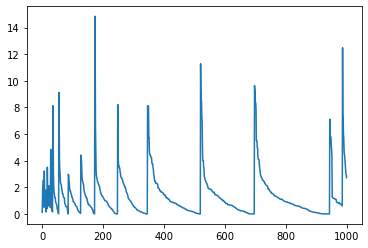

In [20]:
#correlation between CPC and rank?
#by plotting the CPC we have the rank built into the graph already 
#from the graph there is an interesting spiking pattern but there does not 
#seem to be a positive or negative relation for the CPC based on rank. 
# The spikes in the values followed by the exponential decay of the following
#values until the next spike are curious. I wonder if this has to do with the 
#methodology of the data source's ranking system
plt.plot(df['Global CPC'])
plt.show

In [17]:
#what is the avg "ad revenue" (GlobalSearch*CPC)
x = df['Global Search'].values
y = df['Global CPC'].values
df['ad_rev'] = x*y
print(df['ad_rev'].mean())

90501.408


<function matplotlib.pyplot.show(close=None, block=None)>

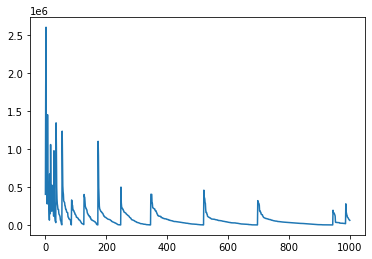

In [18]:
#correlation between rank and "ad revenue"?
#From the graph there is an obvious positive correlation between ad revenue and rank.
#even with the CPC spikes seen before, the shear numbers of the higer ranked questions 
#have produced more ad revenue.
plt.plot(df['ad_rev'])
plt.show

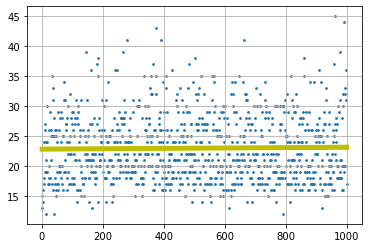

In [19]:
#correlation between question length and rank?
#from the graph of the fitting line, there seems to be no correlation between the 
#length of the question and the rank.

question_len = df['Questions'].apply(lambda x: len(x))

m,b = np.polyfit(df['Rank'],question_len,1)
plt.scatter(df['Rank'],question_len, s = 3)
plt.plot(df['Rank'], m*df['Rank']+b,'y',linewidth = 5)
plt.grid()
plt.show()

In [ ]:
#graph my rank vs normalized ad rev
